# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

1. Open account settings.
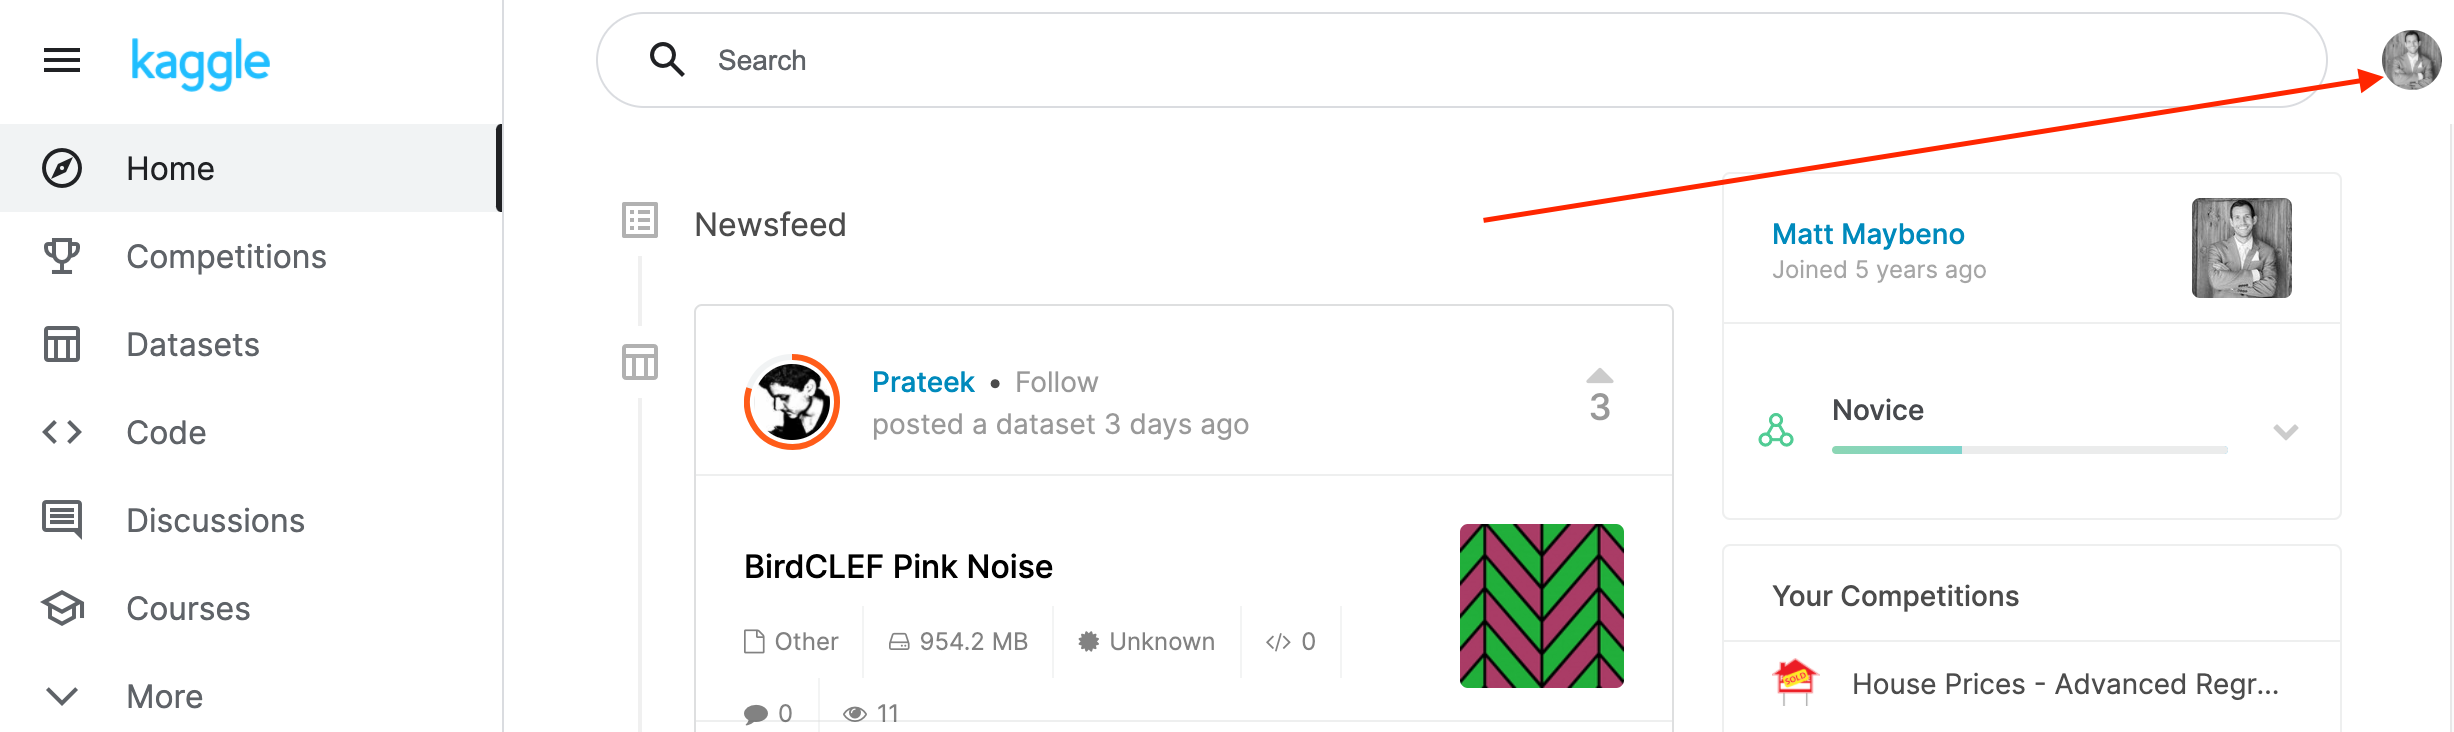
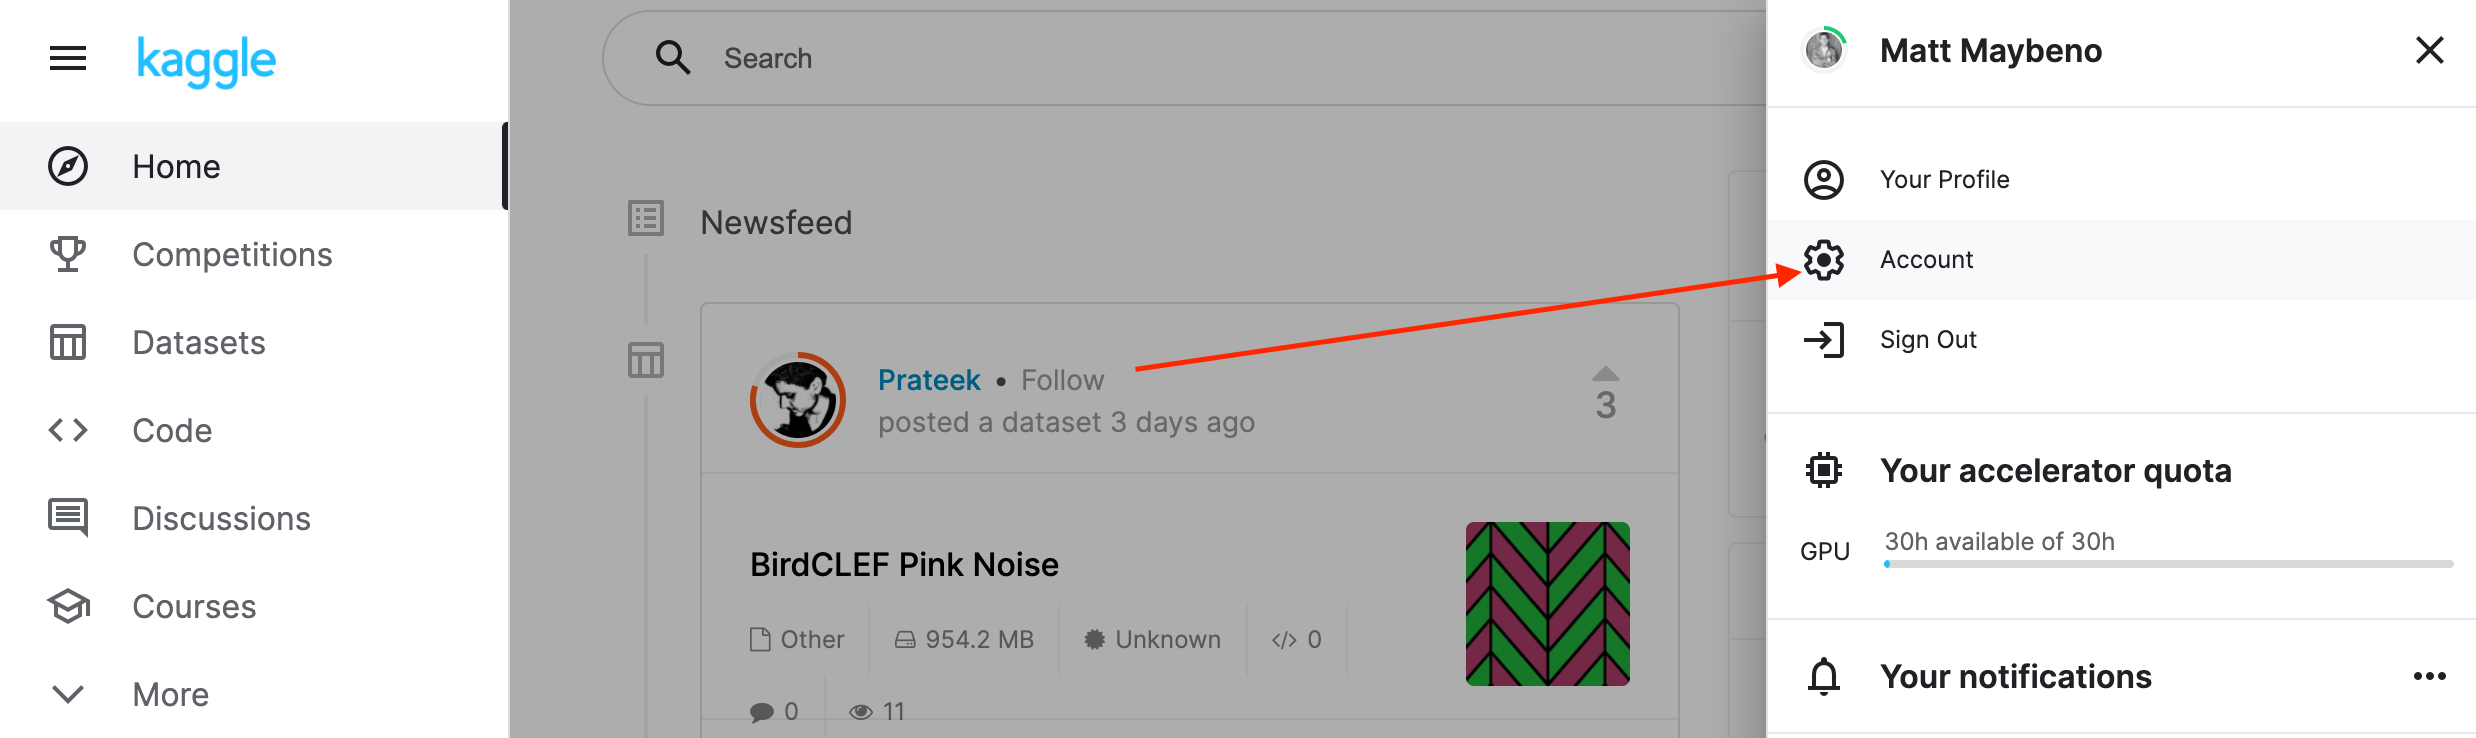
2. Scroll down to API and click Create New API Token.
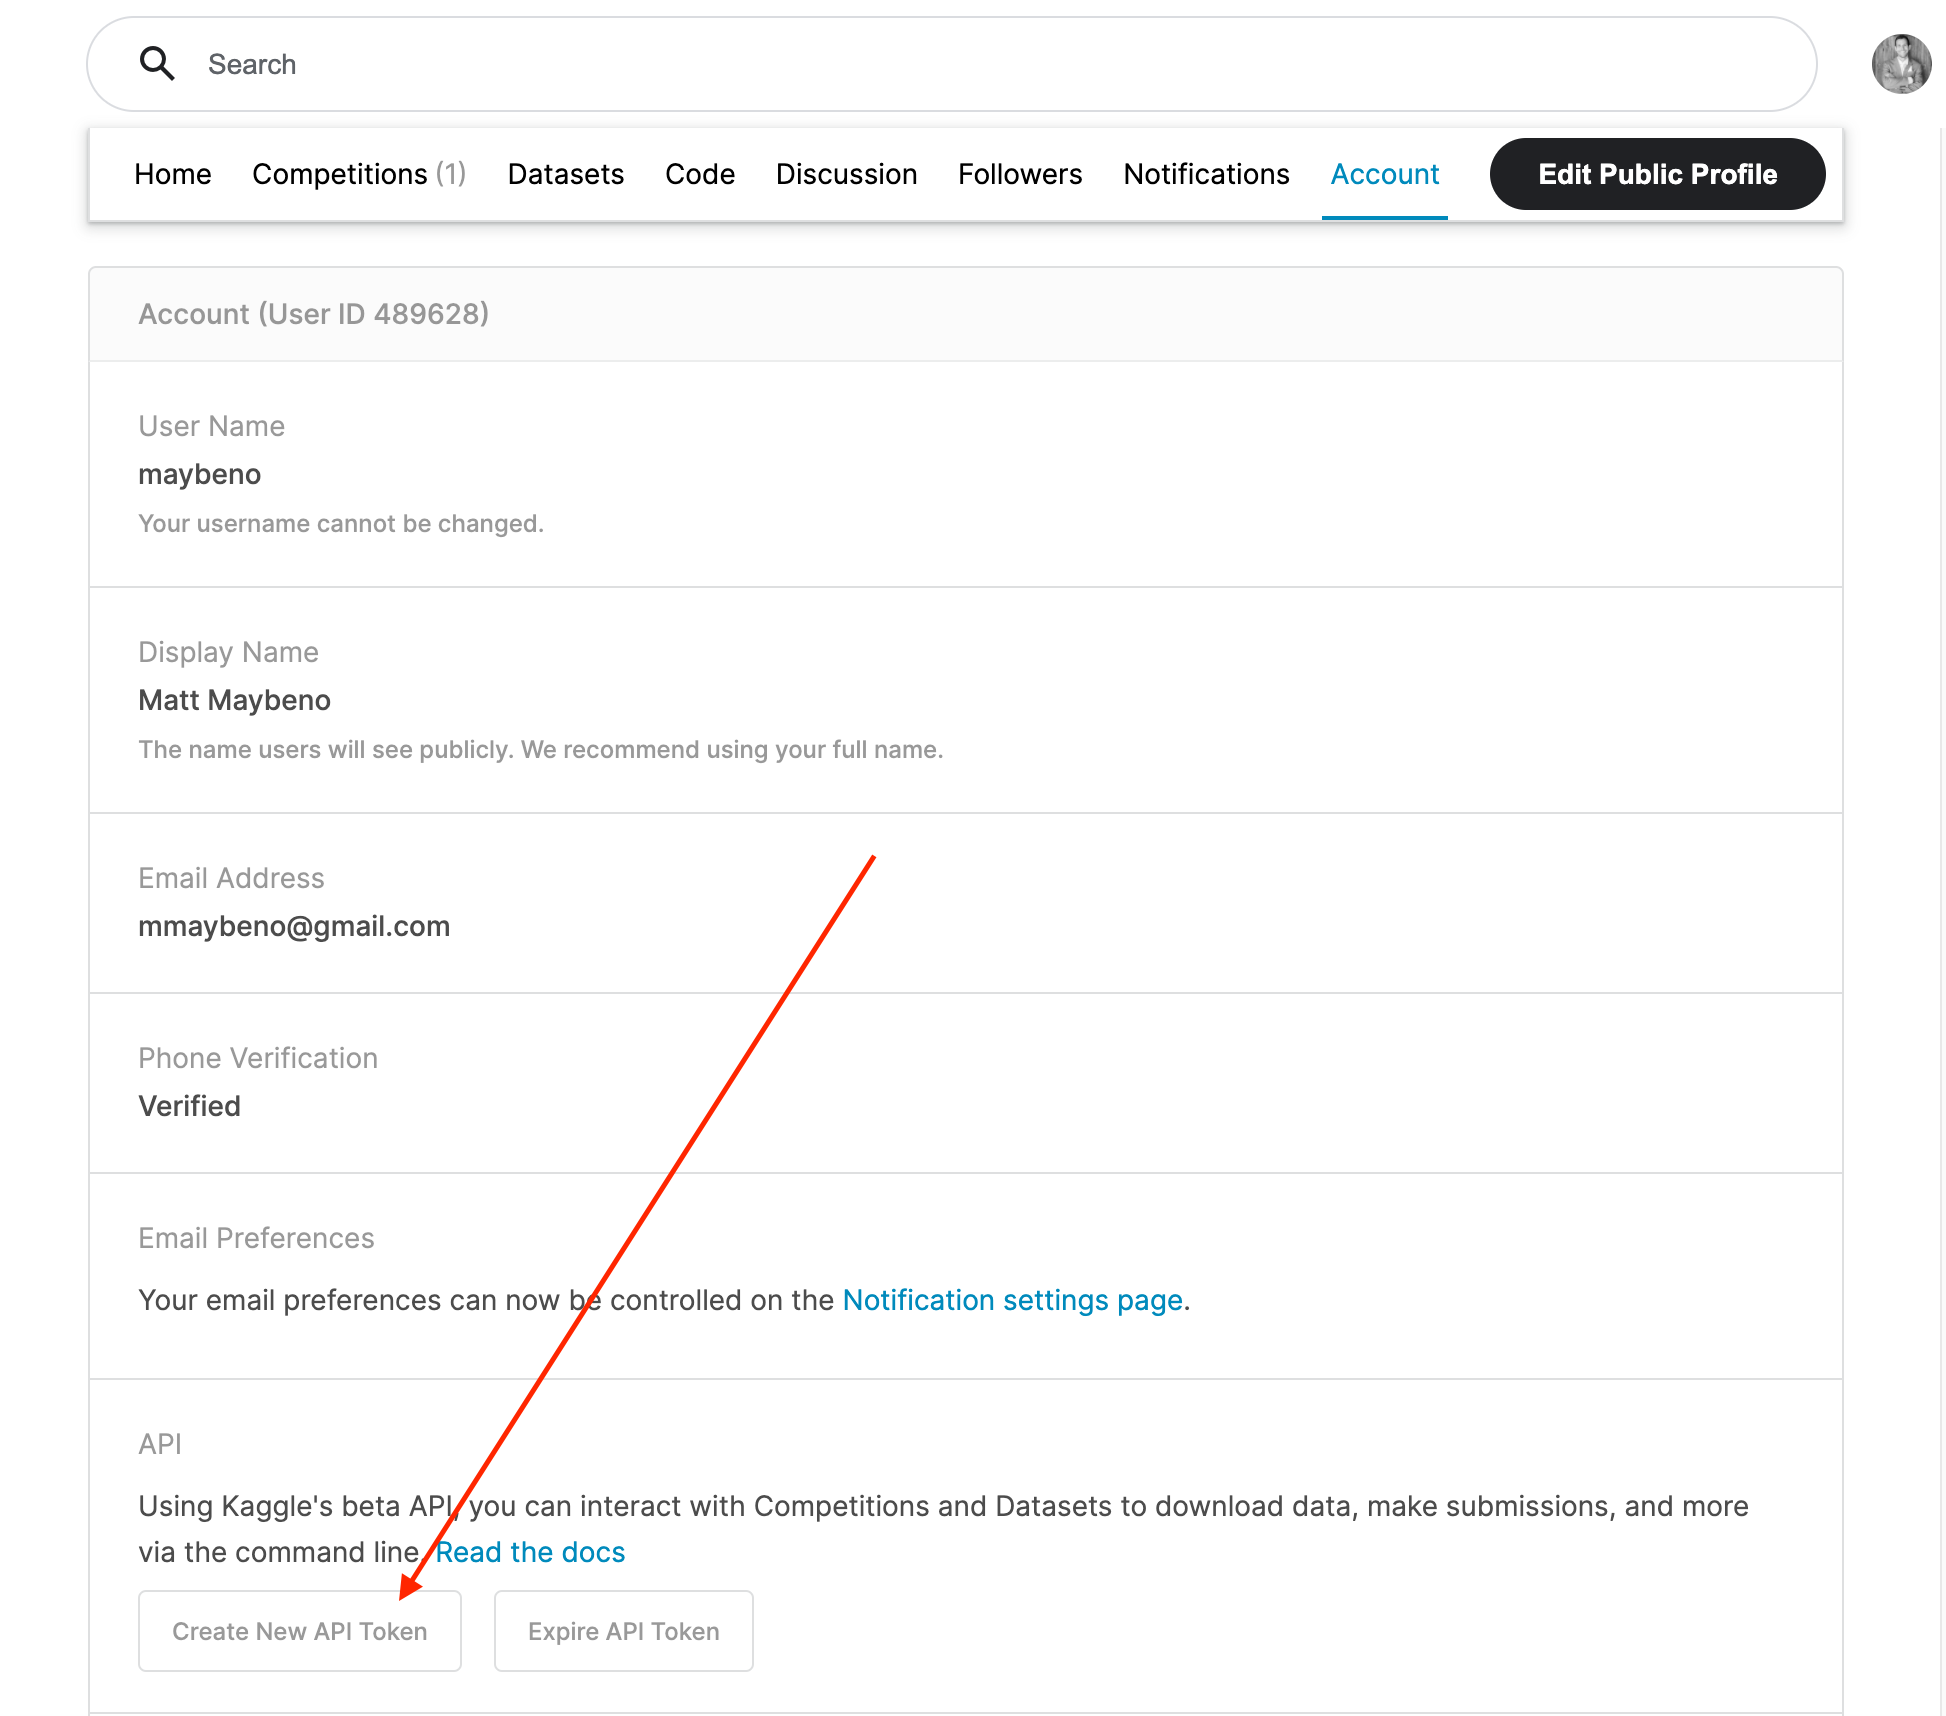
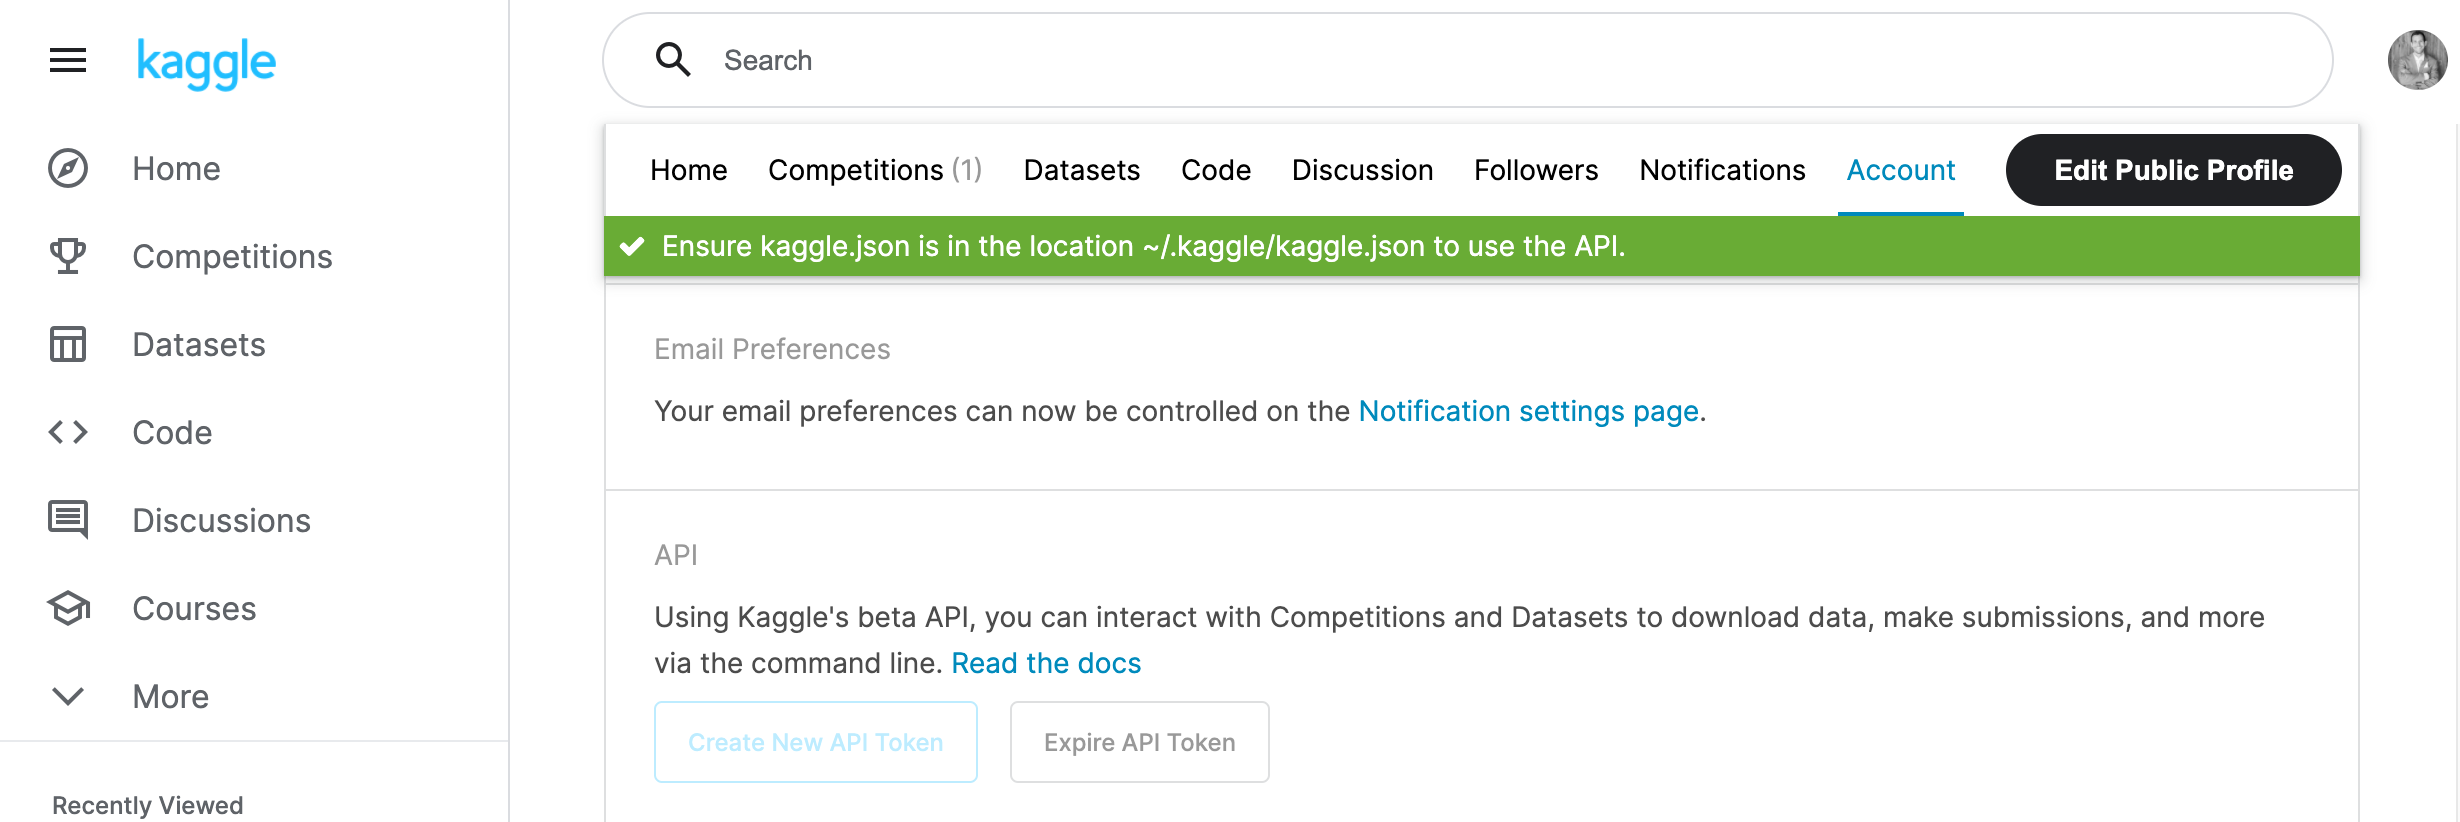
3. Open up `kaggle.json` and use the username and key.
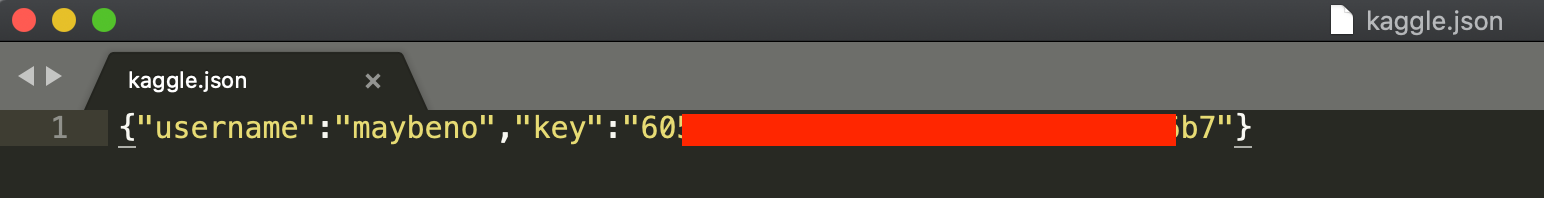

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [ ]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir
# Without --no-cache-dir, smaller aws instances may have trouble installing

### Setup Kaggle API Key

Note: I apllied these steps on my local machine.

In [ ]:
# create the .kaggle directory and an empty kaggle.json file
!mkdir -p /root/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
# Fill in your user name and key from creating the kaggle account and API token file
import json
kaggle_username = ""
kaggle_key = ""

# Save API token the kaggle.json file
with open("kaggle/kaggle.json", "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

### Download and explore dataset

### Go to the bike sharing demand competition and agree to the terms
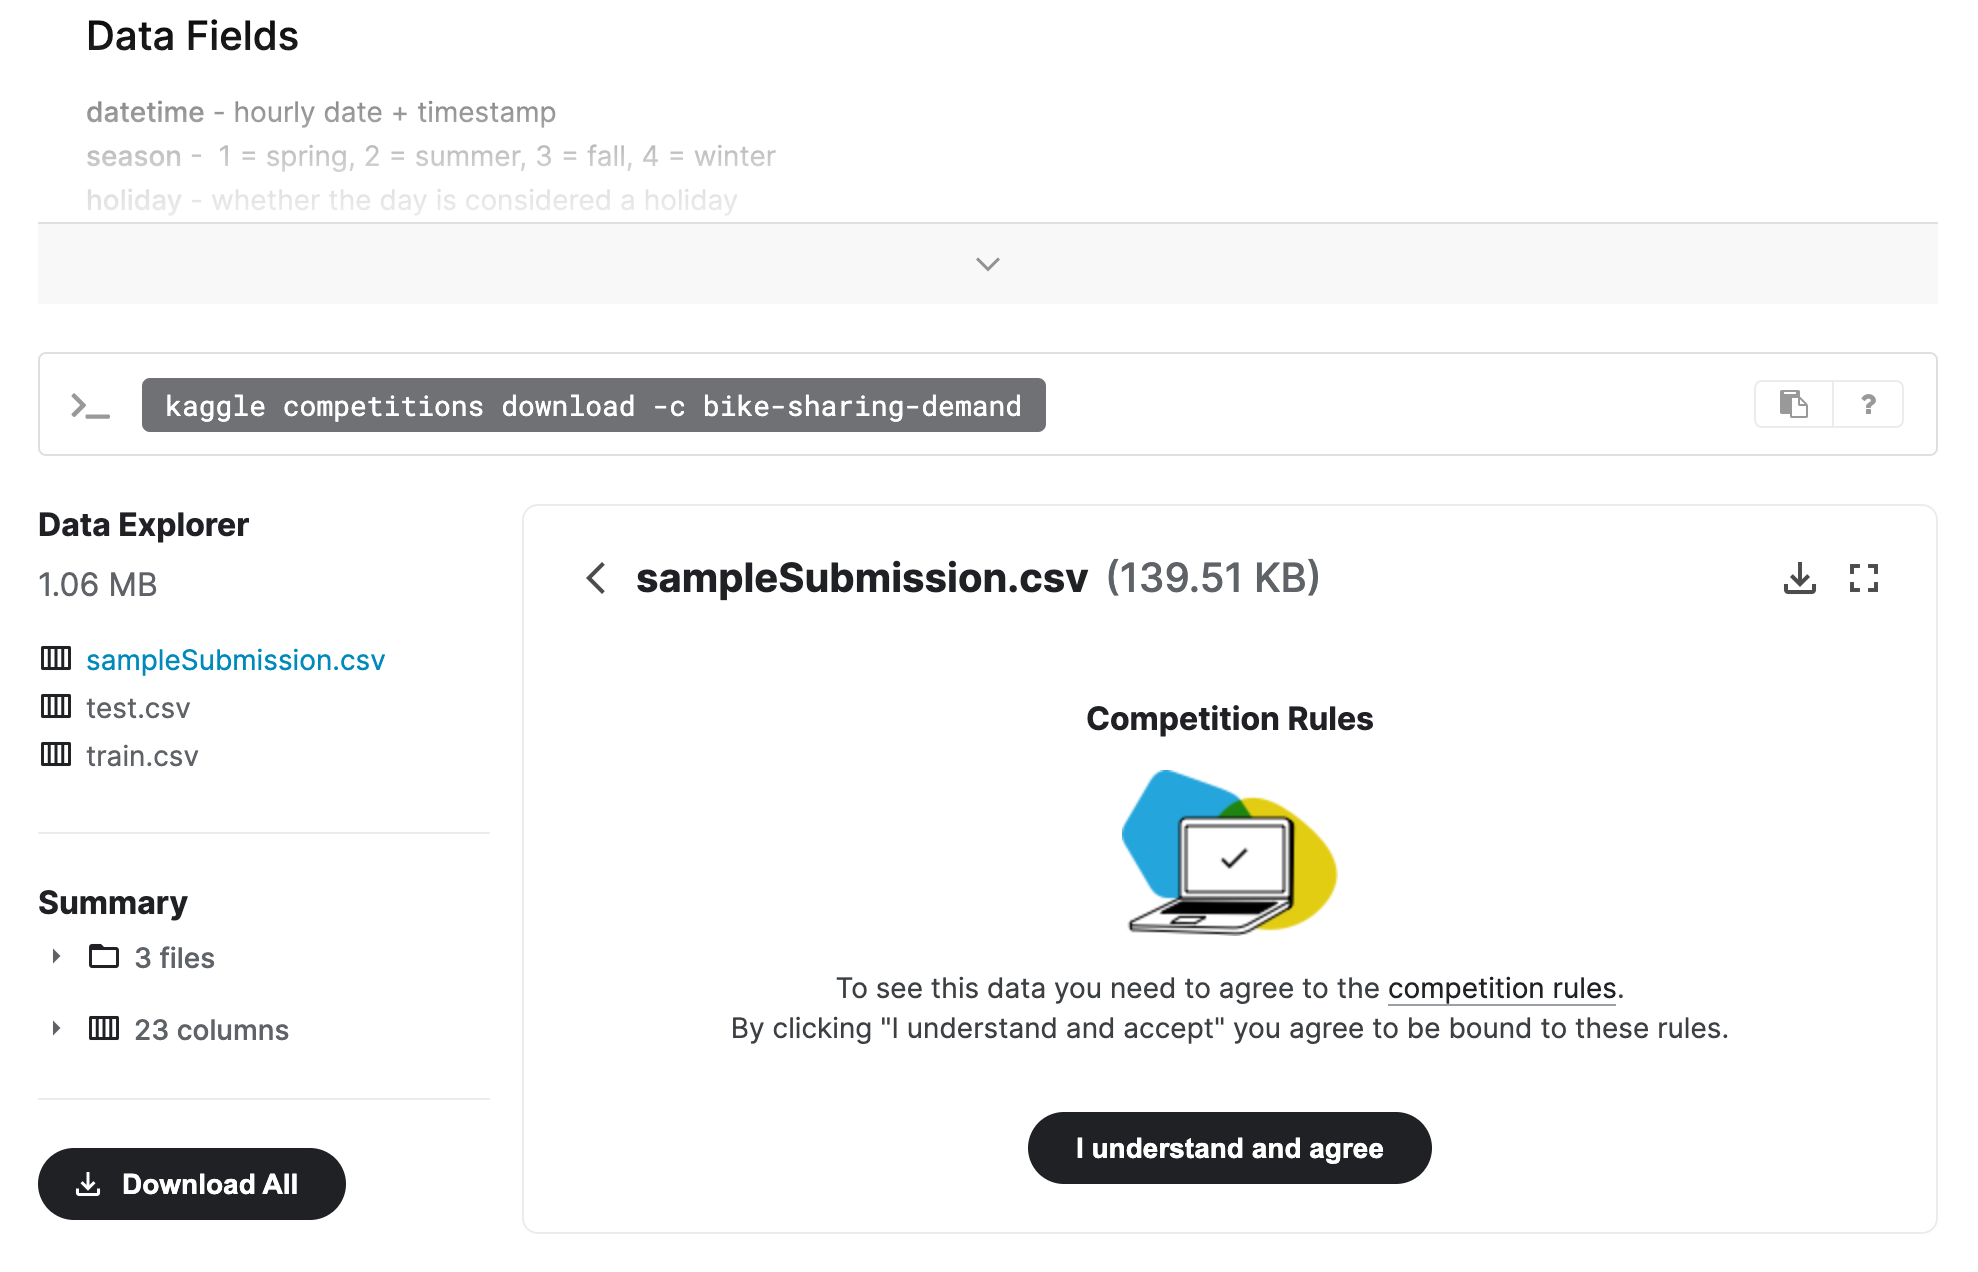

In [2]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
# !unzip -o bike-sharing-demand.zip


  0%|          | 0.00/189k [00:00<?, ?B/s]
100%|##########| 189k/189k [00:01<00:00, 158kB/s]
100%|##########| 189k/189k [00:01<00:00, 158kB/s]


In [3]:
from zipfile import ZipFile
  
# loading the temp.zip and creating a zip object
with ZipFile("bike-sharing-demand.zip", 'r') as zObject:
  
    # Extracting all the members of the zip 
    # into a specific location.
    zObject.extractall(
        path="data")

In [1]:
import pandas as pd
from autogluon.tabular import TabularPredictor

In [6]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv('data\\train.csv', parse_dates=['datetime'])
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [8]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [20]:
print(f"Start date: {train.datetime.min()}\nEnd date: {train.datetime.max()}")

Start date: 2011-01-01 00:00:00
End date: 2012-12-19 23:00:00


In [9]:
train.corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948


In [11]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv("data\\test.csv",parse_dates=["datetime"])
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [12]:
test.shape

(6493, 9)

In [22]:
print(f"Start date: {test.datetime.min()}\nEnd date: {test.datetime.max()}")

Start date: 2011-01-20 00:00:00
End date: 2012-12-31 23:00:00


In [23]:
# Same thing as train and test dataset
submission = pd.read_csv("data\\sampleSubmission.csv")
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [25]:
submission.shape

(6493, 2)

## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are prediting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset. 
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [66]:
train_cols=train.columns.to_list()
unwanted_cols={"casual","registered"}
train_cols=[col for col in train_cols if col not in unwanted_cols ]

In [69]:
train=train[train_cols]
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1


In [70]:
predictor = TabularPredictor(
    label="count"
    ,problem_type='regression', 
    eval_metric='root_mean_squared_error').fit(
    train_data=train, 
    time_limit=600, 
    presets='best_quality', 
    
)

No path specified. Models will be saved in: "AutogluonModels\ag-20230123_052832\"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels\ag-20230123_052832\"
AutoGluon Version:  0.6.1
Python Version:     3.7.4
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   6.3.9600
Train Data Rows:    10886
Train Data Columns: 9
Label Column: count
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    991.68 MB
	Train Data (Original)  Memory Usage: 0.78 MB (0.1% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 2 features to bo

### Review AutoGluon's training run with ranking of models that did the best.

In [71]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -52.841790      11.270870  417.294691                0.001001           0.380120            3       True         13
1   RandomForestMSE_BAG_L2  -53.085802      10.667172  382.606564                6.809901          34.992226            2       True         12
2          LightGBM_BAG_L2  -54.856921       4.459967  381.922346                0.602696          34.308008            2       True         11
3        LightGBMXT_BAG_L2  -61.042714      19.842934  421.912028               15.985663          74.297690            2       True         10
4    KNeighborsDist_BAG_L1  -84.146423       0.110032    0.123026                0.110032           0.123026            1       True          2
5      WeightedEnsemble_L2  -84.146423       0.112535    1.267720         

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.58817625927297,
  'KNeighborsDist_BAG_L1': -84.14642264302901,
  'LightGBMXT_BAG_L1': -178.75183296197693,
  'LightGBM_BAG_L1': -167.61741308295,
  'RandomForestMSE_BAG_L1': -116.97263426116669,
  'CatBoost_BAG_L1': -130.6081826204014,


### Create predictions from test dataset

In [72]:
predictions = predictor.predict(test,as_pandas=True)
predictions.head()

0    21.211468
1    39.305893
2    43.698830
3    46.153790
4    49.275978
Name: count, dtype: float32

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [73]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

count    6493.000000
mean       99.796829
std        89.257462
min         3.328314
25%        19.600655
50%        63.281517
75%       165.752716
max       358.162109
Name: count, dtype: float64

In [78]:
# How many negative values do we have?
(predictions < 0).sum()

0

In [79]:
# Set them to zero
predictions[predictions < 0] = 0

### Set predictions to submission dataframe, save, and submit

In [80]:
submission["count"] = predictions
submission.to_csv("submission_dfs\\submission.csv", index=False)

In [83]:
!kaggle competitions submit -c bike-sharing-demand -f submission_dfs\\submission.csv -m "first raw submission"

Successfully submitted to Bike Sharing Demand



  0%|          | 0.00/195k [00:00<?, ?B/s]
  4%|4         | 8.00k/195k [00:00<00:06, 28.7kB/s]
 45%|####5     | 88.0k/195k [00:00<00:00, 244kB/s] 
 62%|######1   | 120k/195k [00:00<00:00, 218kB/s] 
100%|##########| 195k/195k [00:00<00:00, 354kB/s]
100%|##########| 195k/195k [00:03<00:00, 62.4kB/s]


#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

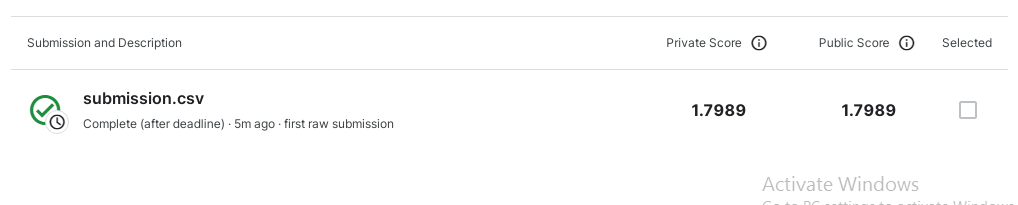

#### Initial score of 1.7989

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

In [21]:
train=pd.read_csv("data/train.csv",parse_dates=["datetime"])

In [23]:
test=pd.read_csv("data/test.csv",parse_dates=["datetime"])

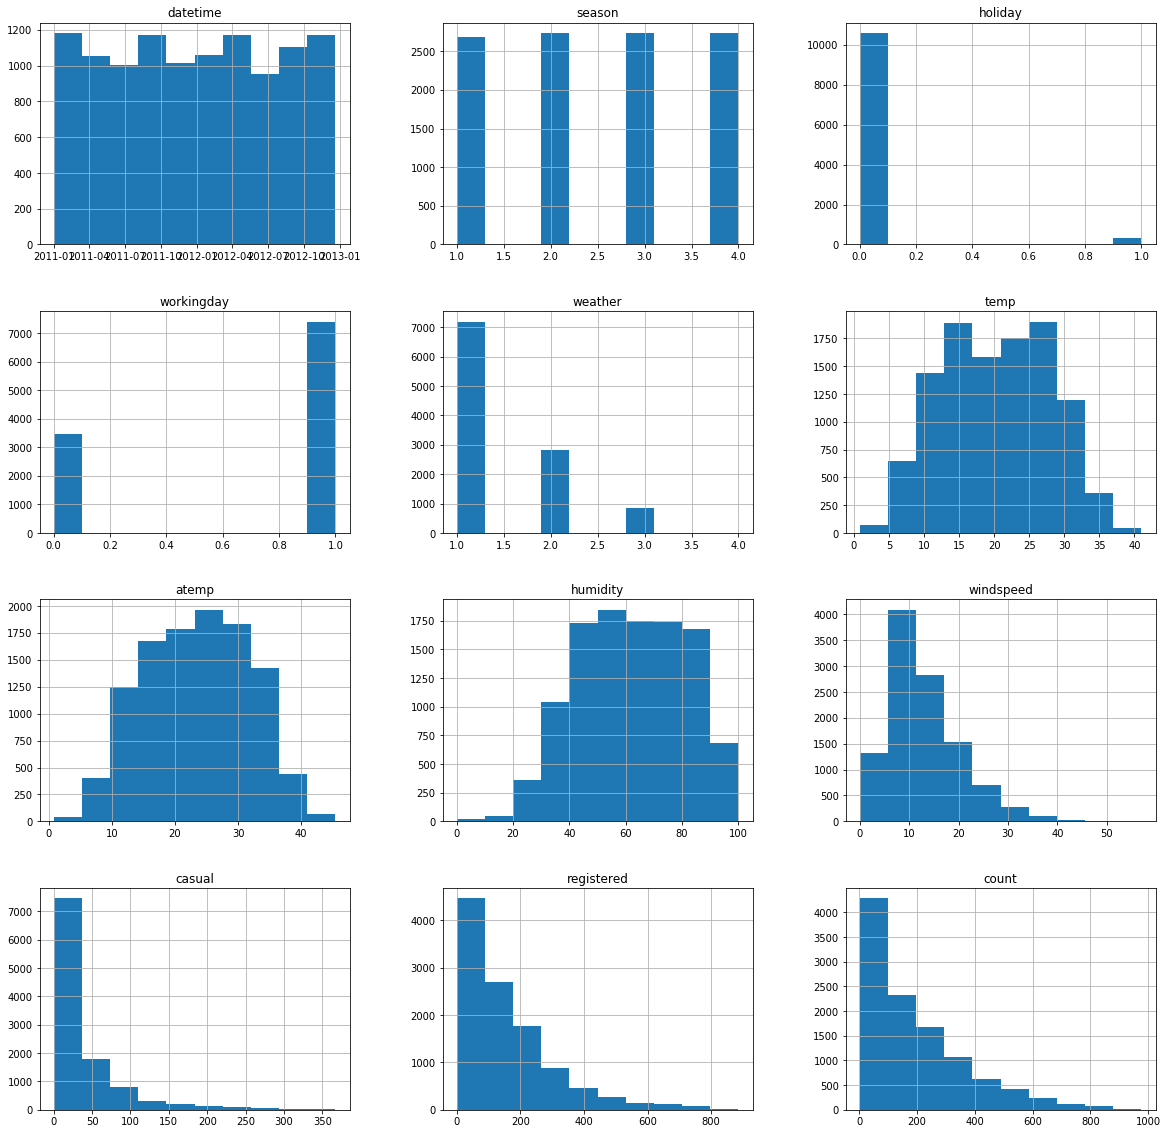

In [22]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
train.hist(figsize=(20,20));

** Histograms depict that there are two features that look nearly normally distributed ["actual temp","temp"], whereas the target variable "count" is right skewed, also ["humidity and windspeed] are left and right-skewed. And skewed features should be transformed to be near to normal distribution before modeling because that affects on prediction.

In [24]:
# create a new feature
train["day"] = train.datetime.dt.day
train["hour"] = train.datetime.dt.hour
train["month"] = train.datetime.dt.month
train["year"] = train.datetime.dt.year

test["day"] = test.datetime.dt.day
test["hour"] = test.datetime.dt.hour
test["month"] = test.datetime.dt.month
test["year"] = test.datetime.dt.year

In [25]:
display(train.head())
print("-"*50)
display(test.head())

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,day,hour,month,year
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,0,1,2011
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,1,2011
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,2,1,2011
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,3,1,2011
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,4,1,2011


--------------------------------------------------


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,day,hour,month,year
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,20,0,1,2011
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,20,1,1,2011
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,20,2,1,2011
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,20,3,1,2011
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,20,4,1,2011


## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [26]:
train["season"] = train.season.astype("category")
train["weather"] = train.weather.astype("category")
test["season"] = test.season.astype("category")
test["weather"] = test.season.astype("category")

In [27]:
# View are new feature
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,day,hour,month,year
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,0,1,2011
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,1,2011
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,2,1,2011
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,3,1,2011
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,4,1,2011


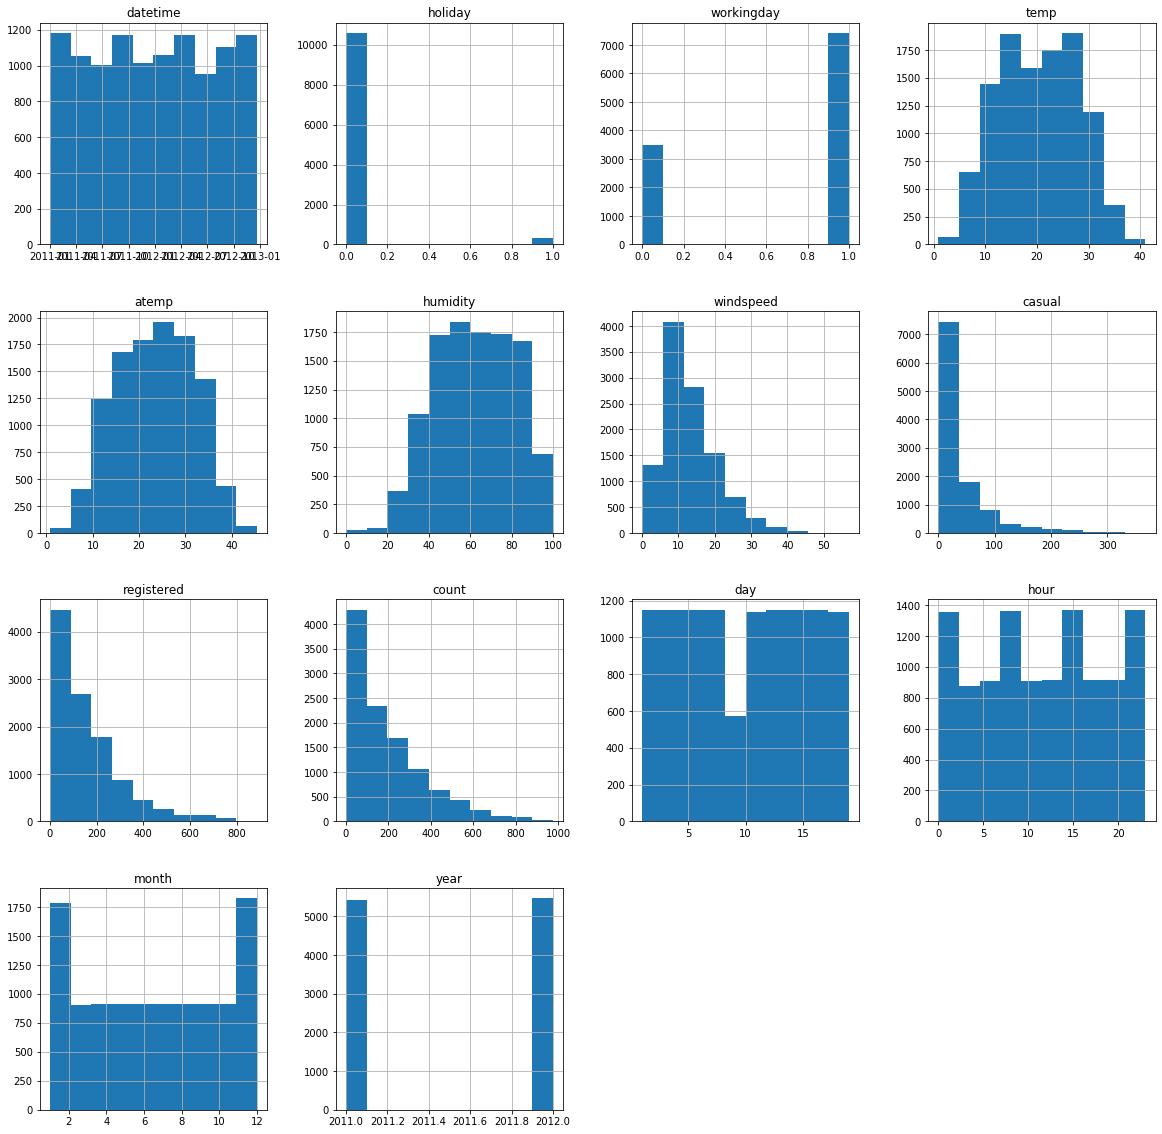

In [28]:
# View histogram of all features again now with the hour feature
train.hist(figsize=(20,20));

## Step 5: Rerun the model with the same settings as before, just with more features

In [30]:
predictor_new_features = TabularPredictor(
    label="count",problem_type="regression",eval_metric="root_mean_squared_error",
    learner_kwargs={"ignored_columns": 
    ["casual", "registered"]}
).fit(train_data=train,time_limit=600, presets="best_quality")

No path specified. Models will be saved in: "AutogluonModels\ag-20230124_072558\"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels\ag-20230124_072558\"
AutoGluon Version:  0.6.1
Python Version:     3.7.4
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   6.3.9600
Train Data Rows:    10886
Train Data Columns: 15
Label Column: count
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Dropping user-specified ignored columns: ['casual', 'registered']
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    997.25 MB
	Train Data (Original)  Memory Usage: 0.98 MB (0.1% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fit

In [31]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -30.646386      15.029691  449.412751                0.001497           0.398065            3       True         11
1          LightGBM_BAG_L2  -31.057683       6.410562  366.381679                1.655592          52.975446            2       True         10
2        LightGBMXT_BAG_L2  -31.363935      13.372602  396.039240                8.617633          82.633007            2       True          9
3      WeightedEnsemble_L2  -34.168830       2.786083  262.828622                0.002000           1.696432            2       True          8
4          CatBoost_BAG_L1  -35.273323       0.372634  240.132607                0.372634         240.132607            1       True          6
5   RandomForestMSE_BAG_L1  -38.327904       1.578050   14.312725         

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.58817625927297,
  'KNeighborsDist_BAG_L1': -84.14642264302901,
  'LightGBMXT_BAG_L1': -176.56932282462262,
  'LightGBM_BAG_L1': -127.07003781014966,
  'RandomForestMSE_BAG_L1': -38.32790411055172,
  'CatBoost_BAG_L1': -35.273323222365974,
  'ExtraTreesMSE_BAG_L1': -38.44871502413579,
  'WeightedEnsemble_L2': -34.16882976608424,
  'LightGBMXT_BAG_L2': -31.36

In [32]:
performance=predictor_new_features.evaluate(train)
performance

Evaluation: root_mean_squared_error on test data: -19.36268023012537
	Note: Scores are always higher_is_better. This metric score can be multiplied by -1 to get the metric value.
Evaluations on test data:
{
    "root_mean_squared_error": -19.36268023012537,
    "mean_squared_error": -374.91338569409373,
    "mean_absolute_error": -12.394282502679511,
    "r2": 0.9885733017247401,
    "pearsonr": 0.9949233250362095,
    "median_absolute_error": -7.4103851318359375
}


{'root_mean_squared_error': -19.36268023012537,
 'mean_squared_error': -374.91338569409373,
 'mean_absolute_error': -12.394282502679511,
 'r2': 0.9885733017247401,
 'pearsonr': 0.9949233250362095,
 'median_absolute_error': -7.4103851318359375}

In [33]:
# Remember to set all negative values to zero
predictions_with_new_feauters=predictor_new_features.predict(test,as_pandas=True)
predictions_with_new_feauters.head()

0    17.226246
1    12.403093
2    12.191075
3    10.427128
4     8.570917
Name: count, dtype: float32

In [34]:
(predictions_with_new_feauters<0).sum()

0

In [35]:
predictions_with_new_feauters[predictions_with_new_feauters<0]=0

In [37]:
# Same submitting predictions
submission_new_features=pd.read_csv("data/sampleSubmission.csv",parse_dates=["datetime"])
submission_new_features["count"] = predictions_with_new_feauters
submission_new_features.to_csv("submission_dfs/submission_new_features.csv", index=False)

In [39]:
!kaggle competitions submit -c bike-sharing-demand -f submission_dfs/submission_new_features.csv -m "new features"

Successfully submitted to Bike Sharing Demand



  0%|          | 0.00/194k [00:00<?, ?B/s]
  4%|4         | 8.00k/194k [00:00<00:07, 24.4kB/s]
 45%|####5     | 88.0k/194k [00:00<00:00, 236kB/s] 
 66%|######5   | 128k/194k [00:00<00:00, 224kB/s] 
100%|##########| 194k/194k [00:00<00:00, 314kB/s]
100%|##########| 194k/194k [00:03<00:00, 59.0kB/s]


In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

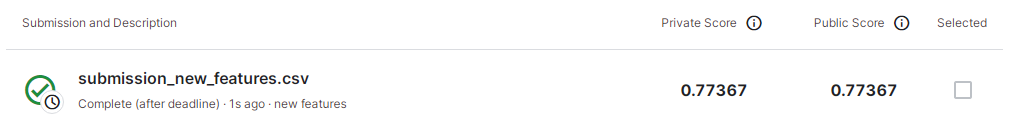

#### New Score of 0.77367

# Additional EDA

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd
import seaborn as sns
from autogluon.tabular import TabularPredictor

In [7]:
train=pd.read_csv("data/train.csv",parse_dates=["datetime"])

In [8]:
test=pd.read_csv("data/test.csv",parse_dates=["datetime"])

In [9]:
# create a new feature
train["day"] = train.datetime.dt.day
train["hour"] = train.datetime.dt.hour
train["month"] = train.datetime.dt.month
train["year"] = train.datetime.dt.year

test["day"] = test.datetime.dt.day
test["hour"] = test.datetime.dt.hour
test["month"] = test.datetime.dt.month
test["year"] = test.datetime.dt.year

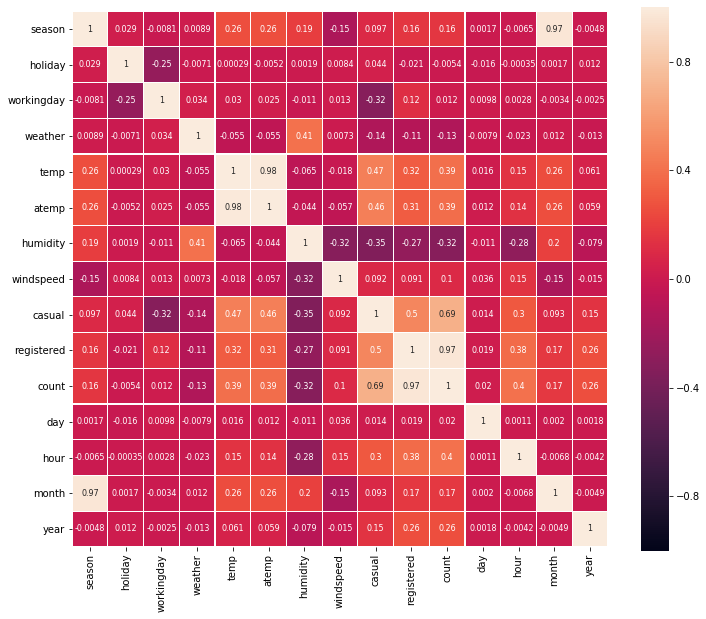

In [23]:
#HeatMap
plt.figure(figsize=(12, 10))
train_copy=train.copy()
train_copy=train_copy.drop(["datetime"],axis=1)
for col in train_copy.columns:
    train_copy[col]=train_copy[col].astype("float")
sns.heatmap(train_copy.corr(), 
             vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

*  The heatmap graph illustrates that most of the features have poor correlation with each other and with the target value "count", although there are some features have highly correlated with each other such as ["atemp" and "temp", "month" and "season"], and we should drop one of them before modeling because that will cause multicollinearity which affects on the prediction. So I will drop the column "temp" because the column "atemp"\actual temperature gives us the same info, and also drop "month" because "season" has the same info.

* Count and Hour have a moderate correlation. 

## Lag plots to check the randomness and outliers on some features.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


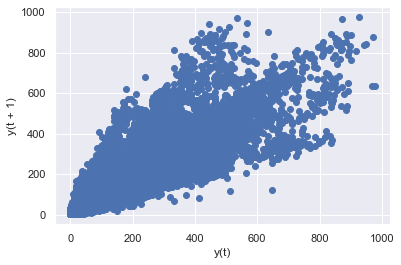

In [72]:
pd.plotting.lag_plot(train["count"]); #target value

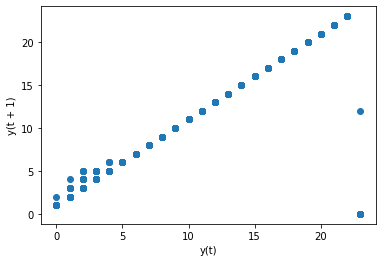

In [24]:
pd.plotting.lag_plot(train.hour);

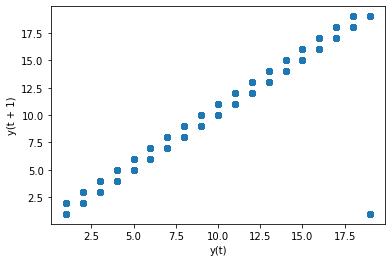

In [26]:
pd.plotting.lag_plot(train.day);

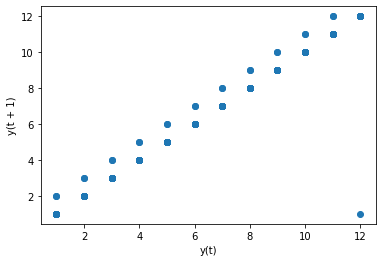

In [28]:
pd.plotting.lag_plot(train.month);

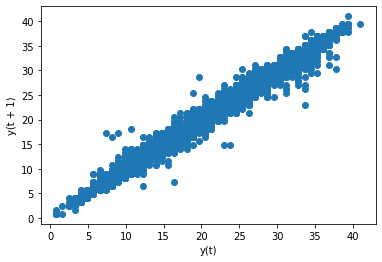

In [29]:
pd.plotting.lag_plot(train.temp);

* lag plots above show a linear pattern which means the data ["count","hour", "day", "month", "temp"] are strongly non-random which is not good for most of the statistical models because randomness is an underlying assumption for most statistical estimation and testing techniques.
* there are some outliers, and they should be handeled. 

** Resources:

[1](https://www.itl.nist.gov/div898/handbook/eda/section3/eda33f.htm)
[2](https://www.itl.nist.gov/div898/handbook/eda/section3/lagplot2.htm)
[3](https://www.itl.nist.gov/div898/handbook/eda/section3/lagplot3.htm)



## The distrbution of the total number of bikes over  seasons:
    
   1 = spring, 2 = summer, 3 = fall, 4 = winter

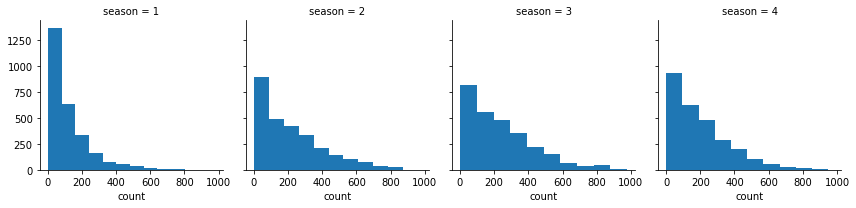

In [41]:
# Plot the Seaborn's FacetGrid
g = sns.FacetGrid(data = train, col ="season")
g.map(plt.hist, "count");

### weather
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

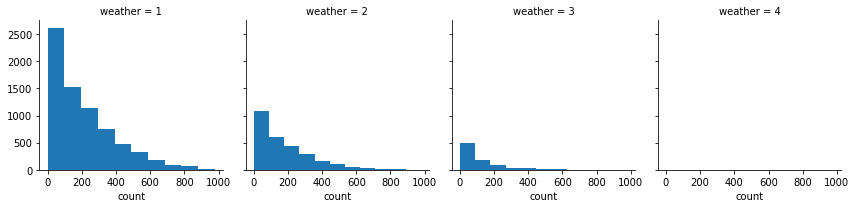

In [34]:
g = sns.FacetGrid(data = train, col = 'weather')
g.map(plt.hist, "count");

In [48]:
train.loc[train.weather == 4]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,day,hour,month,year
5631,2012-01-09 18:00:00,1,0,1,4,8.2,11.365,86,6.0032,6,158,164,9,18,1,2012


* Facet grid graphs with classes in weather and season columns show how weather condition has a strong effect on rental bikes, therefore bikes rent most of the time in good weather whereas no rents in bad weather/class 4: "Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog" because logically people wouldn't sacrifice their lives and rent a bike in bad weather.


### Line Plots graphs.

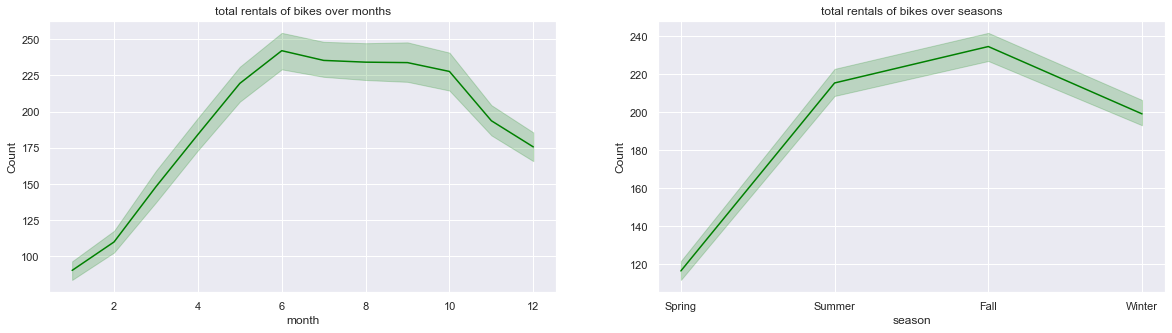

In [65]:
plt.figure(figsize = [20, 5])
plt.subplot(1, 2, 1)
sns.set()
sns.lineplot(x=train["month"],y=train["count"],color='green')
plt.xlabel('month')
plt.ylabel('Count')
plt.title('total rentals of bikes over months')
plt.subplot(1, 2, 2)
sns.lineplot(x=train["season"],y=train["count"],color='green').axes.set_xticklabels(['Spring', 'Summer', 'Fall','Winter'])
plt.xticks([1,2,3,4])             
plt.xlabel('season')
plt.ylabel('Count')
plt.title('total rentals of bikes over seasons');

* The line plot graphs with ["month", "season"] columns emphasize, what we have already observed with facet grid graphs, that weather has a huge effect on total rents, thus, bikes rent more in summer and fall.

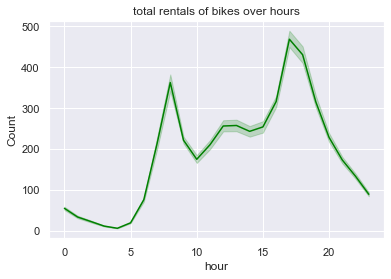

In [73]:
sns.lineplot(x=train["hour"],y=train["count"],color='green')
plt.xlabel('hour')
plt.ylabel('Count')
plt.title('total rentals of bikes over hours');

* The line graph highlights that over time of the day, total rents are nonconstant, with 2 peaks around 8 am and between 5 pm and 6 pm.

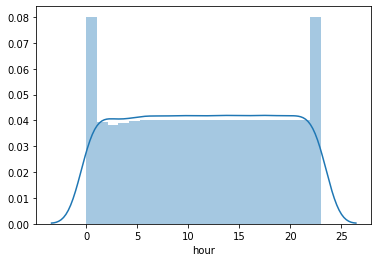

In [25]:
sns.distplot(train["hour"]);

### count of rows that have a zero value in wind speed column

In [10]:
#windspeed ==0 
train.loc[train.windspeed == 0]


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,day,hour,month,year
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,0,1,2011
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,1,2011
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,2,1,2011
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,3,1,2011
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,4,1,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10826,2012-12-17 12:00:00,4,0,1,2,16.40,20.455,87,0.0,21,211,232,17,12,12,2012
10829,2012-12-17 15:00:00,4,0,1,2,17.22,21.210,88,0.0,15,196,211,17,15,12,2012
10846,2012-12-18 08:00:00,4,0,1,1,15.58,19.695,94,0.0,10,652,662,18,8,12,2012
10860,2012-12-18 22:00:00,4,0,1,1,13.94,16.665,49,0.0,5,127,132,18,22,12,2012


In [11]:
test.loc[test.windspeed == 0]


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,day,hour,month,year
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0,20,1,1,2011
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0,20,2,1,2011
12,2011-01-20 12:00:00,1,0,1,2,12.30,16.665,42,0.0,20,12,1,2011
60,2011-01-22 13:00:00,1,0,0,1,3.28,8.335,35,0.0,22,13,1,2011
62,2011-01-22 15:00:00,1,0,0,1,4.92,7.575,28,0.0,22,15,1,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6433,2012-12-29 12:00:00,1,0,0,3,8.20,12.120,100,0.0,29,12,12,2012
6434,2012-12-29 13:00:00,1,0,0,3,8.20,12.120,100,0.0,29,13,12,2012
6436,2012-12-29 15:00:00,1,0,0,2,9.84,12.120,87,0.0,29,15,12,2012
6444,2012-12-29 23:00:00,1,0,0,2,10.66,12.120,60,0.0,29,23,12,2012


* there are 1313 rows in train data and 867 in test data that have a zero value in the windspeed column, and maybe that occurs because of  = missing values or there is something wrong with acquiring data from the system. 

### Feature transformation 

In [12]:
import numpy as np

In [13]:
# check if there is any negative values before normalization
(train.drop("datetime",axis=1) <0).sum()

season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
day           0
hour          0
month         0
year          0
dtype: int64

In [14]:
train["windspeed_log"]=np.log((1+train["windspeed"]))
train["humidity_log"]=np.log((1+train["humidity"]))

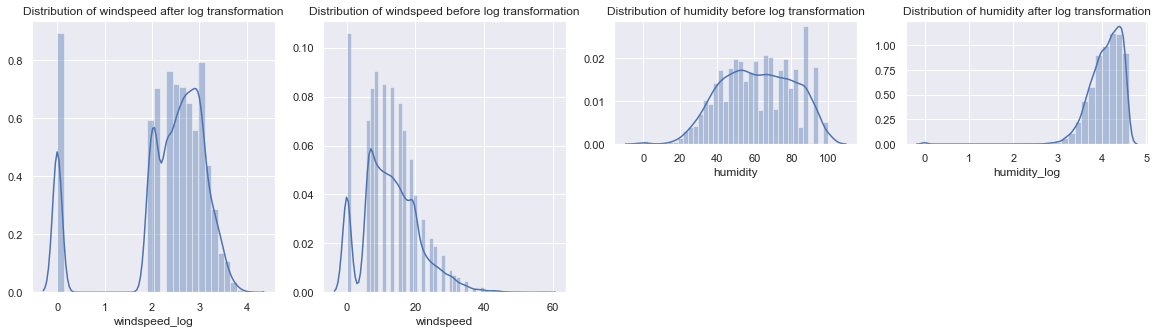

In [15]:
plt.figure(figsize = [20, 5])
sns.set()
plt.subplot(1,4, 1)
sns.distplot(train["windspeed_log"],bins=30)
plt.xlabel('windspeed_log')
plt.title('Distribution of windspeed after log transformation')
plt.subplot(1, 4, 2)
sns.distplot(train["windspeed"])
plt.xlabel('windspeed')
plt.title('Distribution of windspeed before log transformation')
plt.subplot(2, 4,3)
sns.distplot(train["humidity"])
plt.xlabel('humidity')
plt.title('Distribution of humidity before log transformation')
plt.subplot(2, 4,4)
sns.distplot(train["humidity_log"],bins=30)
plt.xlabel('humidity_log')
plt.title('Distribution of humidity after log transformation');

In [16]:
train["windspeed"]=np.log((1+train["windspeed"]))
train["humidity"]=np.log((1+train["humidity"]))

## perpeare data for modeling.

In [17]:
train["season"] = train.season.astype("category")
train["weather"] = train.weather.astype("category")
test["season"] = test.season.astype("category")
test["weather"] = test.season.astype("category")

### drop highly correlated cols and unwanted_cols

In [18]:
train_df=train.drop(["windspeed_log","humidity_log","atemp","month","casual","registered","datetime"],axis=1)

In [19]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      10886 non-null  category
 1   holiday     10886 non-null  int64   
 2   workingday  10886 non-null  int64   
 3   weather     10886 non-null  category
 4   temp        10886 non-null  float64 
 5   humidity    10886 non-null  float64 
 6   windspeed   10886 non-null  float64 
 7   count       10886 non-null  int64   
 8   day         10886 non-null  int64   
 9   hour        10886 non-null  int64   
 10  year        10886 non-null  int64   
dtypes: category(2), float64(3), int64(6)
memory usage: 787.2 KB


In [20]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    6493 non-null   datetime64[ns]
 1   season      6493 non-null   category      
 2   holiday     6493 non-null   int64         
 3   workingday  6493 non-null   int64         
 4   weather     6493 non-null   category      
 5   temp        6493 non-null   float64       
 6   atemp       6493 non-null   float64       
 7   humidity    6493 non-null   int64         
 8   windspeed   6493 non-null   float64       
 9   day         6493 non-null   int64         
 10  hour        6493 non-null   int64         
 11  month       6493 non-null   int64         
 12  year        6493 non-null   int64         
dtypes: category(2), datetime64[ns](1), float64(3), int64(7)
memory usage: 571.2 KB


In [21]:
#prepare test data
test_df=test.drop(["atemp","month","datetime"],axis=1)
test_df["windspeed"]=np.log((1+test_df["windspeed"]))
test_df["humidity"]=np.log((1+test_df["humidity"]))

In [22]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      6493 non-null   category
 1   holiday     6493 non-null   int64   
 2   workingday  6493 non-null   int64   
 3   weather     6493 non-null   category
 4   temp        6493 non-null   float64 
 5   humidity    6493 non-null   float64 
 6   windspeed   6493 non-null   float64 
 7   day         6493 non-null   int64   
 8   hour        6493 non-null   int64   
 9   year        6493 non-null   int64   
dtypes: category(2), float64(3), int64(5)
memory usage: 419.0 KB


In [23]:
train_df.to_csv("train_df_with_modification.csv",index=False)
test_df.to_csv("test_df_with_modification.csv",index=False)

## Train Model with default hyperparameters, after log transforming skewed features ["humidity","wind speed"] and deleting highly correlated ["temp","month"].

In [24]:
predictor_new_normalized_features = TabularPredictor(
    label="count",problem_type="regression",eval_metric="root_mean_squared_error"
).fit(train_data=train_df,time_limit=600, presets="best_quality")

No path specified. Models will be saved in: "AutogluonModels\ag-20230129_225126\"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels\ag-20230129_225126\"
AutoGluon Version:  0.6.1
Python Version:     3.7.4
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   6.3.9600
Train Data Rows:    10886
Train Data Columns: 10
Label Column: count
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    961.83 MB
	Train Data (Original)  Memory Usage: 0.72 MB (0.1% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 3 features to b

Fitting model: LightGBM_BAG_L1 ... Training model for up to 359.62s of the 559.64s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
2023-01-30 00:52:06,874	ERROR worker.py:400 -- Unhandled error (suppress with 'RAY_IGNORE_UNHANDLED_ERRORS=1'): ray::_ray_fit() (pid=7300, ip=127.0.0.1)
  File "python\ray\_raylet.pyx", line 620, in ray._raylet.execute_task
  File "C:\Users\-TOSHIBA-\AppData\Roaming\Python\Python37\site-packages\ray\_private\memory_monitor.py", line 164, in raise_if_low_memory
    used_gb, total_gb, self.error_threshold
ray._private.memory_monitor.RayOutOfMemoryError: More than 95% of the memory on node TOSHIBA is used (3.68 / 3.87 GB). The top 10 memory consumers are:

PID	MEM	COMMAND
5924	0.36GiB	C:\Users\-TOSHIBA-\Anaconda3\python.exe -m ipykernel_launcher -f C:\Users\-TOSHIBA-\AppData\Roaming\
560	0.33GiB	C:\Program Files (x86)\Google\Chrome\Application\chrome.exe --type=renderer --disable-gpu-compositin
2752	0.2G

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	-40.3891	 = Validation score   (-root_mean_squared_error)
	44.73s	 = Training   runtime
	0.85s	 = Validation runtime
Fitting model: RandomForestMSE_BAG_L2 ... Training model for up to 1.44s of the 1.39s of remaining time.
	-40.9127	 = Validation score   (-root_mean_squared_error)
	50.63s	 = Training   runtime
	1.94s	 = Validation runtime
Completed 1/20 k-fold bagging repeats ...
Fitting model: WeightedEnsemble_L3 ... Training model for up to 360.0s of the -56.33s of remaining time.
	-39.884	 = Validation score   (-root_mean_squared_error)
	0.39s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 656.76s ... Best model: "WeightedEnsemble_L3"
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("AutogluonModels\ag-20230129_225126\")


In [25]:
predictor_new_normalized_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -39.883980      12.082082  500.227307                0.001001           0.385124            3       True         12
1      WeightedEnsemble_L2  -40.179749       2.296651  267.877954                0.002000           1.810855            2       True          8
2          LightGBM_BAG_L2  -40.389089       6.734711  398.026585                0.845387          44.729481            2       True         10
3        LightGBMXT_BAG_L2  -40.530024       9.292500  404.481931                3.403177          51.184826            2       True          9
4   RandomForestMSE_BAG_L2  -40.912750       7.832517  403.927877                1.943193          50.630772            2       True         11
5          CatBoost_BAG_L1  -41.142690       0.414883  255.352407         

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -107.92639861765058,
  'KNeighborsDist_BAG_L1': -110.44408105921188,
  'LightGBM_BAG_L1': -152.39762671639468,
  'RandomForestMSE_BAG_L1': -43.80773985434891,
  'CatBoost_BAG_L1': -41.14268999717915,
  'ExtraTreesMSE_BAG_L1': -43.4073576198992,
  'NeuralNetFastAI_BAG_L1': -126.82587130561178

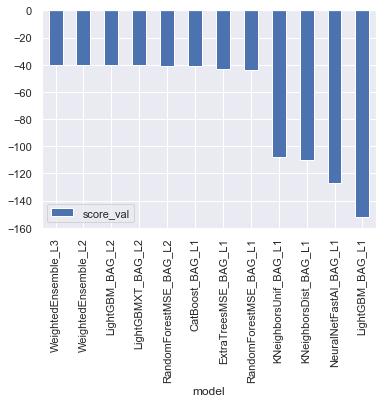

In [26]:
predictor_new_normalized_features.leaderboard(silent=True).plot(kind="bar",x="model",y="score_val");

In [108]:
# predictor_new_normalized_features.feature_importance()

In [27]:
# Remember to set all negative values to zero
predictions_new_normalized_features=predictor_new_normalized_features.predict(test_df,as_pandas=True)

In [28]:
predictions_new_normalized_features.head()

0    12.060536
1     6.111565
2     5.396200
3     4.650963
4     4.197787
Name: count, dtype: float32

In [29]:
(predictions_new_normalized_features <0).sum()

0

In [30]:
submission_new_normalized_features=pd.read_csv("data/sampleSubmission.csv",parse_dates=["datetime"])

In [31]:
# Same submitting predictions
submission_new_normalized_features["count"] = predictions_new_normalized_features
submission_new_normalized_features.to_csv("submission_dfs\submission_new_normalized_features.csv", index=False)

In [32]:
!kaggle competitions submit -c bike-sharing-demand -f submission_dfs\submission_new_normalized_features.csv -m "adding, deletion, and transforming skewed features. without hyperparameters optimization."

Successfully submitted to Bike Sharing Demand



  0%|          | 0.00/194k [00:00<?, ?B/s]
  4%|4         | 8.00k/194k [00:00<00:06, 28.0kB/s]
 45%|####5     | 88.0k/194k [00:00<00:00, 255kB/s] 
 66%|######5   | 128k/194k [00:00<00:00, 228kB/s] 
100%|##########| 194k/194k [00:00<00:00, 324kB/s]
100%|##########| 194k/194k [00:02<00:00, 86.2kB/s]


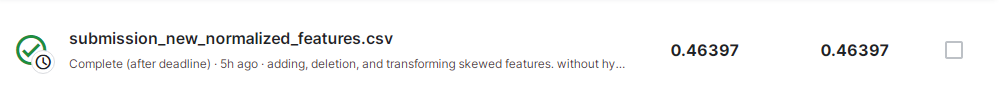

#### New Score of  0.46397

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [1]:
import pandas 
import seaborn

In [3]:
train=pandas.read_csv("data/train.csv",parse_dates=["datetime"])
test=pandas.read_csv("data/test.csv",parse_dates=["datetime"])

In [4]:
# create a new feature
train["day"] = train.datetime.dt.day
train["hour"] = train.datetime.dt.hour
train["month"] = train.datetime.dt.month
train["year"] = train.datetime.dt.year

test["day"] = test.datetime.dt.day
test["hour"] = test.datetime.dt.hour
test["month"] = test.datetime.dt.month
test["year"] = test.datetime.dt.year

In [5]:
train["season"] = train.season.astype("category")
train["weather"] = train.weather.astype("category")
test["season"] = test.season.astype("category")
test["weather"] = test.season.astype("category")

In [6]:
import autogluon.core as ag

In [9]:
# dir(ag)

In [12]:
catboost_hyperparams = {
    'iterations' : 100,
    'learning_rate' : ag.space.Real(lower=0.01, upper=0.3, log=True),
    'depth' : ag.space.Int(lower=4, upper=10)
}
gbm_hyperparams = { 
    'num_boost_round': 100,
    'learning_rate' : ag.space.Real(lower=0.01, upper=0.3, log=True),
    'num_leaves': ag.space.Int(lower=10, upper=26, default=16)
}  
hyperparameters={
    "CAT":catboost_hyperparams,
    "GBM":gbm_hyperparams
}

hyperparameter_tune_kwargs = {
    'scheduler' : 'local',
    'searcher' : "auto"
}    

In [16]:
predictor_new_hpo = TabularPredictor(
    label="count",
    problem_type="regression",
    eval_metric="root_mean_squared_error",
    learner_kwargs={"ignored_columns":["casual", "registered"]}
).fit(
    train_data=train,
    time_limit=600, 
    presets='best_quality',
    hyperparameters=hyperparameters,
    hyperparameter_tune_kwargs=hyperparameter_tune_kwargs
    
)

No path specified. Models will be saved in: "AutogluonModels\ag-20230126_182958\"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels\ag-20230126_182958\"
AutoGluon Version:  0.6.1
Python Version:     3.7.4
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   6.3.9600
Train Data Rows:    10886
Train Data Columns: 15
Label Column: count
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Dropping user-specified ignored columns: ['casual', 'registered']
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    949.58 MB
	Train Data (Original)  Memory Usage: 0.98 MB (0.1% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fit

In [17]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                  model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0    CatBoost_BAG_L2\T2  -37.201412       0.018033  392.690991                0.000000          83.825146            2       True         11
1   WeightedEnsemble_L3  -37.201412       0.020034  393.835030                0.002002           1.144039            3       True         12
2    CatBoost_BAG_L1\T2  -38.481466       0.000000   60.178714                0.000000          60.178714            1       True          5
3   WeightedEnsemble_L2  -38.481466       0.002001   61.183954                0.002001           1.005240            2       True          7
4    CatBoost_BAG_L1\T3  -53.143086       0.000500   59.016919                0.000500          59.016919            1       True          6
5    CatBoost_BAG_L2\T1  -82.179893       0.018033  370.852520                0.000000      

{'model_types': {'LightGBM_BAG_L1\\T1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1\\T2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1\\T3': 'StackerEnsembleModel_LGB',
  'CatBoost_BAG_L1\\T1': 'StackerEnsembleModel_CatBoost',
  'CatBoost_BAG_L1\\T2': 'StackerEnsembleModel_CatBoost',
  'CatBoost_BAG_L1\\T3': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBM_BAG_L2\\T1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2\\T2': 'StackerEnsembleModel_LGB',
  'CatBoost_BAG_L2\\T1': 'StackerEnsembleModel_CatBoost',
  'CatBoost_BAG_L2\\T2': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'LightGBM_BAG_L1\\T1': -179.84287126587586,
  'LightGBM_BAG_L1\\T2': -167.52415585848408,
  'LightGBM_BAG_L1\\T3': -160.80075637476412,
  'CatBoost_BAG_L1\\T1': -124.78158081198616,
  'CatBoost_BAG_L1\\T2': -38.48146585630511,
  'CatBoost_BAG_L1\\T3': -53.14308553792412,
  'WeightedEnsemble_L2': -38.48146

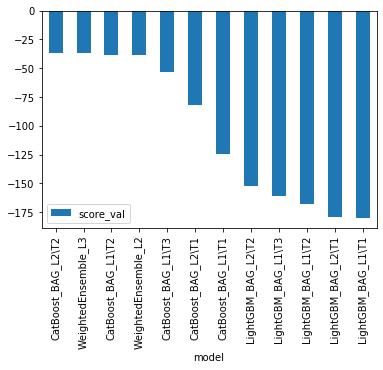

In [19]:
predictor_new_hpo.leaderboard(silent=True).plot(kind="bar",x="model",y="score_val");

In [20]:
performance=predictor_new_hpo.evaluate(train)
performance

Evaluation: root_mean_squared_error on test data: -28.085876431018168
	Note: Scores are always higher_is_better. This metric score can be multiplied by -1 to get the metric value.
Evaluations on test data:
{
    "root_mean_squared_error": -28.085876431018168,
    "mean_squared_error": -788.8164548984406,
    "mean_absolute_error": -18.45647703872245,
    "r2": 0.9759582667127304,
    "pearsonr": 0.987944368332707,
    "median_absolute_error": -11.472259521484375
}


{'root_mean_squared_error': -28.085876431018168,
 'mean_squared_error': -788.8164548984406,
 'mean_absolute_error': -18.45647703872245,
 'r2': 0.9759582667127304,
 'pearsonr': 0.987944368332707,
 'median_absolute_error': -11.472259521484375}

In [21]:
# Remember to set all negative values to zero
predictions_new_hpo=predictor_new_hpo.predict(test,as_pandas=True)

In [22]:
predictions_new_hpo.head()

0    12.808854
1     6.184105
2     4.016968
3     3.816920
4     3.796296
Name: count, dtype: float32

In [25]:
(predictions_new_hpo <0).sum()

1

In [26]:
predictions_new_hpo[predictions_new_hpo < 0] = 0

In [28]:
submission_new_hpo=pd.read_csv("data/sampleSubmission.csv",parse_dates=["datetime"])

In [29]:
# Same submitting predictions
submission_new_hpo["count"] = predictions_new_hpo
submission_new_hpo.to_csv("submission_dfs\submission_new_hpo.csv", index=False)

In [30]:
!kaggle competitions submit -c bike-sharing-demand -f submission_dfs\submission_new_hpo.csv -m "new features with hyperparameters"

Successfully submitted to Bike Sharing Demand



  0%|          | 0.00/194k [00:00<?, ?B/s]
  4%|4         | 8.00k/194k [00:00<00:08, 23.1kB/s]
 45%|####5     | 88.0k/194k [00:00<00:00, 207kB/s] 
 62%|######1   | 120k/194k [00:00<00:00, 168kB/s] 
100%|##########| 194k/194k [00:00<00:00, 270kB/s]
100%|##########| 194k/194k [00:03<00:00, 60.6kB/s]


In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

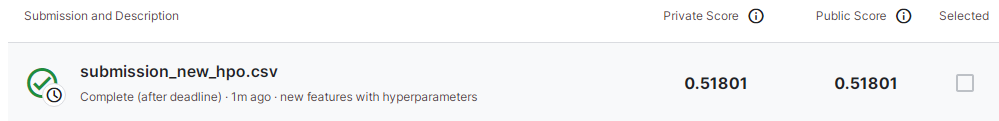

#### New Score of  0.51801

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

In [21]:
import matplotlib.pyplot as plt

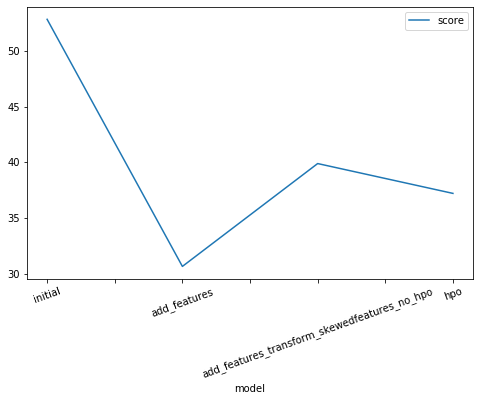

In [28]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features","add_features_transform_skewedfeatures_no_hpo", "hpo"],
        "score": [52.84, 30.64,39.88 ,37.20]
    }
).plot(x="model", y="score", figsize=(8, 5)).get_figure()
plt.xticks(rotation=20)
fig.savefig('img/model_train_score.png');

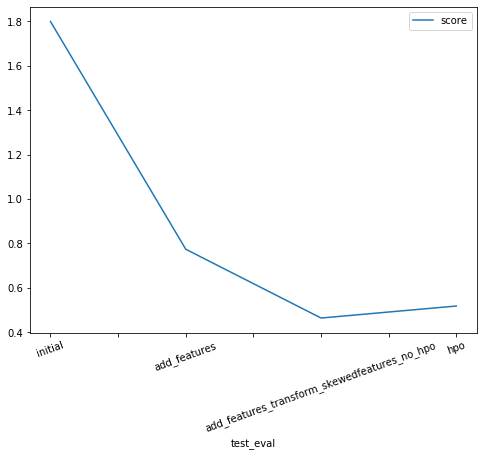

In [26]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features","add_features_transform_skewedfeatures_no_hpo" ,"hpo"],
        "score": [1.7989, 0.77367,0.46397 ,0.51801]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
plt.xticks(rotation=20)
fig.savefig('img/model_test_score.png')

### Hyperparameter table

In [27]:
# The 3 hyperparameters we tuned with the kaggle score as the result
pd.DataFrame({
    "model": ["initial", "add_features", "add_features_transform_skewedfeatures_no_hpo" ,"hpo"],
    "hpo1":[
        'default', 'default',"defult","Cat: iterations:100,learning_rate: lower=0.01, upper=0.3, log=True, depth:lower=4, upper=10" ],
    "hpo2": [
        'default', 'default', "defult","GMB: num_boost_round:100,learning_rate: lower=0.01, upper=0.3, log=True,num_leaves:lower=10, upper=26, default=16"],
    "score": [1.7989, 0.77367,0.46397 ,0.51801]
})

,model,hpo1,hpo2,score
0,initial,default,default,1.79890
1,add_features,default,default,0.77367
2,add_features_transform_skewedfeatures_no_hpo,defult,defult,0.46397
3,hpo,"Cat: iterations:100,learning_rate: lower=0.01,...","GMB: num_boost_round:100,learning_rate: lower=...",0.51801
